# Examples of SPECNamelist

@author: Zhisong Qu (zhisong.qu@anu.edu.au)

To use this utility, the f90nml package is needed.
One can install it by

`pip install f90nml`

## 1. Import SPEC hdf5 reader and SPECNamelist

In [1]:
import py_spec
from py_spec import SPEC
from py_spec.SPECNamelist import SPECNamelist
from py_spec import compare_spec

## 2. Generate SPECNamelist. There are two ways to generate it:
Here, we assume that one ran SPEC on `G3V02L1Fi.001.sp`. SPEC generated two output files, `G3V02L1Fi.001.sp.end` and `G3V02L1Fi.001.sp.h5`

### 1) It can be initialized from a .sp or .sp.end file -- the ordinary SPEC namelists

In [2]:
namelist_end = SPECNamelist('G3V02L1Fi.001.sp.end')

### 2) It can be generated from the SPEC class reading the SPEC hdf5 output file

In [3]:
spec_hdf5 = SPEC('G3V02L1Fi.001.sp.h5')
namelist_h5 = SPECNamelist(spec_hdf5)

## 3. Writing the namelist into file
Here we write the two namelist objects into two different namelist intput files. One can run them and compare their outputs using compare_spec. They should be identical.

If the file exists, one needs to put `force=True` to force overwriting.

In [4]:
namelist_h5.write('test_h5.sp',force=True)
namelist_end.write('test_end.sp',force=True)

## 4. Running SPEC directly using SPECNamelist (Optional)
If we set up properly, one can directly run SPEC using SPECNamelist.run(). This only works if one can run SPEC directly, for example on a personal PC or when an interactive job is running for this Notebook. If you need to submit a job to run SPEC, you cannot use it.

### 1) We will need to set up the command to run SPEC.
We let 
`SPEC_command = '/path/to/xspec'`, or `'mpirun -np 2 /path/to/spec'`

### 2) We set up the filename the namelist is going to output into and SPEC is going to run with
Something like `filename = 'test.sp'`, meaning that the file we are going to run is 'test.sp'.

### 3) Finally, we run SPEC
The command looks like 

`new_output = SPECNamelist.run(SPEC_command, filename).`

If SPEC runs successfully, the hdf5 file will be read and return as new_output.

To check the output of SPEC, one needs to check the terminal in which Jupyter Notebook is launched.

In this section, we run SPEC with both the namelist generated from the .end file and .h5 file, they should be identical.

In [5]:
SPEC_command = '/Users/zhisong/Codes/SPEC_hdf5master/SPEC/xspec'

filename = 'test_end.sp'
output_end = namelist_end.run(SPEC_command, filename, force=True)

filename = 'test_h5.sp'
output_h5 = namelist_h5.run(SPEC_command, filename, force=True)

SPEC is running...
SPEC runs successfully.
SPEC is running...
SPEC runs successfully.


## 5. Now we test if the two outputs obtained by running the two namelists above are identical

If you can run part 4, `output_end` and `output_h5` will be loaded already. We reload them just in case you cannot run part 4.

In [6]:
from py_spec.compare_spec import compare_spec
output_end = SPEC('test_end.sp.h5')
output_h5 = SPEC('test_h5.sp.h5')
ismatch = compare_spec(output_end, output_h5)
print('------------------')
if ismatch:
    print('All test matches!')
else:
    print('Something is not matching')

------------------
Elements in grid
ok: BR
ok: BZ
ok: Bp
ok: Nt
ok: Ntz
ok: Nz
ok: Rij
ok: Zij
ok: pi2nfp
ok: sg
------------------
Elements in input
------------------
Elements in diagnostics
ok: LHevalues
ok: LHevectors
ok: LHmatrix
ok: Lcheck
ok: Lperturbed
ok: Ltiming
ok: Ppts
ok: absacc
ok: absreq
ok: dpp
ok: dqq
ok: epsr
ok: fudge
ok: nPpts
ok: nPtrj
ok: odetol
ok: relreq
ok: scaling
------------------
Elements in global1
ok: Lfindzero
ok: LreadGF
ok: bnsblend
ok: bnstol
ok: c05factor
ok: c05xmax
ok: c05xtol
ok: epsilon
ok: escale
ok: forcetol
ok: gBnbld
ok: gBntol
ok: mcasingcal
ok: mfreeits
ok: opsilon
ok: pcondense
ok: upsilon
ok: vcasingeps
ok: vcasingits
ok: vcasingper
ok: vcasingtol
ok: wpoloidal
------------------
Elements in local
ok: LBeltrami
ok: Linitgues
ok: Lposdef
ok: maxrndgues
------------------
Elements in numerics
ok: Lextrap
ok: Linitialize
ok: Lsparse
ok: Lsvdiota
ok: Lzerovac
ok: Mregular
ok: Ndiscrete
ok: Nquad
ok: iMpol
ok: iNtor
ok: imethod
ok: iorder
ok: 

## 6. Changing the namelist

### 1). Changing individual items
In this example, we change tflux of the inner most volume from 0.3 to 0.4 and see what happens. We do it based on `namelist_h5`.

To do so, we can run

`namelist_h5['physicslist']['tflux'][0]=0.4`

We will plot the result before and after the change.

SPEC is running...
SPEC runs successfully.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116b4d850>)

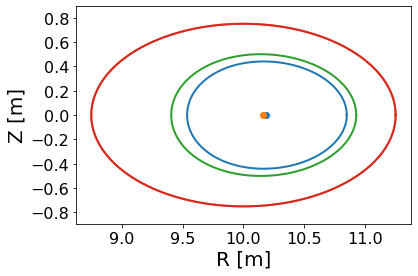

In [7]:
# Read namelist
spec_hdf5 = SPEC('G3V02L1Fi.001.sp.h5')
namelist_h5 = SPECNamelist(spec_hdf5)

# plot the KAM surfaces of this output
py_spec.plot.plot_kam_surface(spec_hdf5)

# modify tflux
namelist_h5['physicslist']['tflux'][0]=0.4

# run the new namelist (or you can write it and run it manually)
SPEC_command = '/Users/zhisong/Codes/SPEC_hdf5master/SPEC/xspec'
filename = 'test_h5.sp'
output_h5 = namelist_h5.run(SPEC_command, filename, force=True)

# plot the new KAM surfaces
py_spec.plot.plot_kam_surface(output_h5)

### 2). Changing resolution
We change SPEC resolution from Mpol=4, Ntor=4 to Mpol=5, Ntor=5.
To do so, we can run

`namelist_h5.update_resolution(new_Mpol=5, new_Ntor=5)`

We will plot the result before and after the change.

SPEC is running...
SPEC runs successfully.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116b3ac40>)

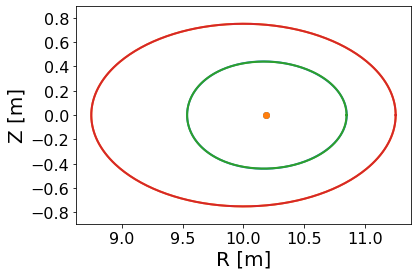

In [8]:
# Read namelist
spec_hdf5 = SPEC('G3V02L1Fi.001.sp.h5')
namelist_h5 = SPECNamelist(spec_hdf5)

# plot the KAM surfaces of this output
py_spec.plot.plot_kam_surface(spec_hdf5)

# modify resolution
namelist_h5.update_resolution(new_Mpol=5, new_Ntor=5)

# run the new namelist (or you can write it and run it manually)
SPEC_command = '/Users/zhisong/Codes/SPEC_hdf5master/SPEC/xspec'
filename = 'test_h5.sp'
output_h5 = namelist_h5.run(SPEC_command, filename, force=True)

# plot the new KAM surfaces
py_spec.plot.plot_kam_surface(output_h5)

### 3). Add interface
We can add an interface to existing equilibrium. The initial guess of the interface geometry will be automatically generated, while one needs to take case of things like iota, oita, pressure and so on. 

As an example, we add between the 0th and 1st interface a new interface, with tflux = 0.9
To do so, we can run

`namelist_h5.insert_volume(ivol=1,tflux=0.9)`

We will plot the result before and after the change.

SPEC is running...
SPEC runs successfully.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1171d99a0>)

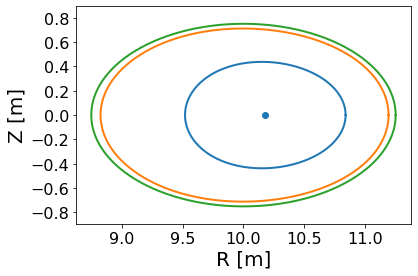

In [9]:
# Read namelist
spec_hdf5 = SPEC('G3V02L1Fi.001.sp.h5')
namelist_h5 = SPECNamelist(spec_hdf5)

# add an interface
namelist_h5.insert_volume(ivol=1,tflux=0.9)

# adjust iota and oita
namelist_h5['physicslist']['iota'][2] = 0.314
namelist_h5['physicslist']['oita'][2] = 0.314

# run the new namelist (or you can write it and run it manually)
SPEC_command = '/Users/zhisong/Codes/SPEC_hdf5master/SPEC/xspec'
filename = 'test_h5.sp'
output_h5 = namelist_h5.run(SPEC_command, filename, force=True)

# plot the new KAM surfaces
py_spec.plot.plot_kam_surface(output_h5)

### 3). Remove interface
We can remove an interface from existing equilibrium.

As an example, we remove the 1st interface. The equilibrium should now become single volume
To do so, we can run

`namelist_h5.remove_volume(ivol=0)`

We will plot the result before and after the change.

SPEC is running...
SPEC runs successfully.


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116b2dee0>)

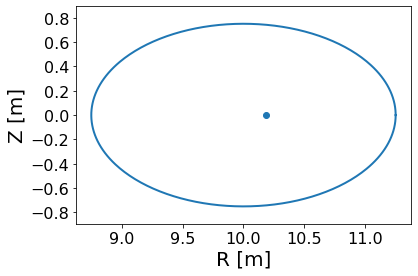

In [10]:
# Read namelist
spec_hdf5 = SPEC('G3V02L1Fi.001.sp.h5')
namelist_h5 = SPECNamelist(spec_hdf5)

# add an interface
namelist_h5.remove_volume(ivol=0)


# run the new namelist (or you can write it and run it manually)
SPEC_command = '/Users/zhisong/Codes/SPEC_hdf5master/SPEC/xspec'
filename = 'test_h5.sp'
output_h5 = namelist_h5.run(SPEC_command, filename, force=True)

# plot the new KAM surfaces
py_spec.plot.plot_kam_surface(output_h5)